In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitparse
import os
import copy
from datetime import datetime

In [59]:
%run GarminFitParser.py

In [104]:
folder = './Data/Pokeloop Bike Rides'

files = os.listdir(folder)

dfs = []

for filename in files:
    filepath = os.path.join(folder, filename)
    dfs += [GetFitDf(filepath)]

In [105]:
dfs_new = []
for df in dfs:
    dfs_new += [MakeConversions(df)]
dfs = dfs_new

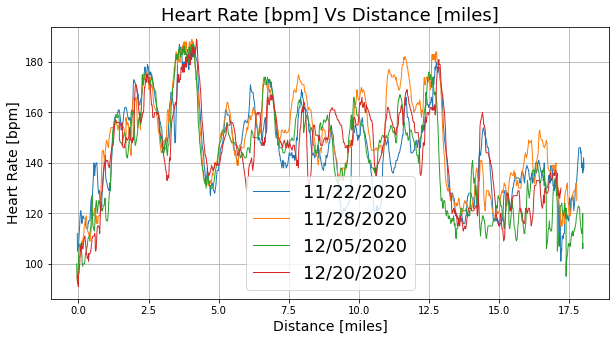

In [121]:
plt.figure(figsize=(10,5))

x_var = 'Distance [miles]'
y_var = 'Heart Rate [bpm]'

for df in dfs:
    df.loc[:, x_var] -= df.loc[10, x_var]
    PlotFitData(df, x_var=x_var, y_var=y_var)

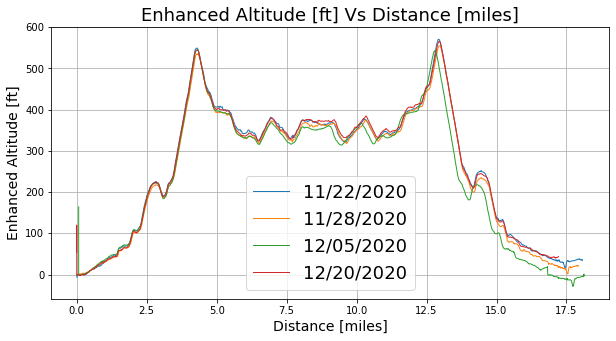

In [139]:
plt.figure(figsize=(10,5))

x_var = 'Distance [miles]'
y_var = 'Enhanced Altitude [ft]'

for i, df in enumerate(dfs):
    idx_ref = np.argmax(df[y_var].values[:int(len(df[y_var]) / 2)])
    df.loc[:, x_var] -= df.loc[idx_ref, x_var]
    
    if i == 0:
        d0 = dfs[0][x_var].values[0]
    
    df[x_var] -= d0
    df.loc[:, y_var] -= df.loc[10, y_var]
    PlotFitData(df, x_var=x_var, y_var=y_var)

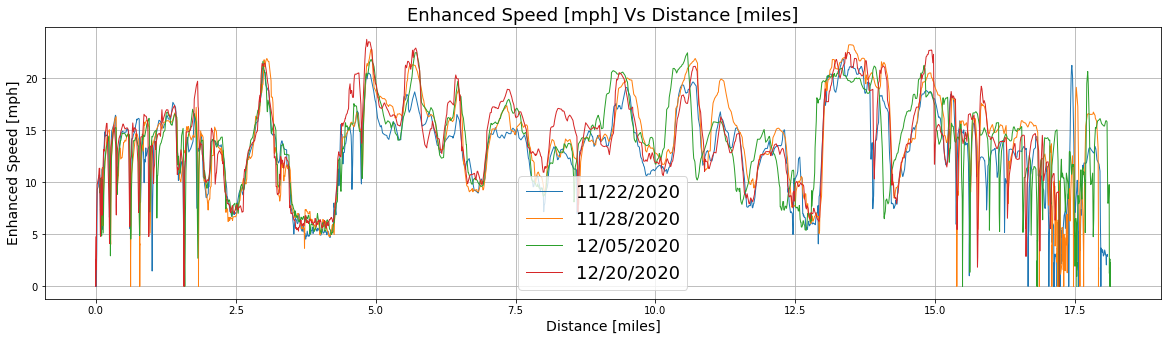

In [141]:
plt.figure(figsize=(20,5))

x_var = 'Distance [miles]'
y_var = 'Enhanced Speed [mph]'

for df in dfs:
    PlotFitData(df, x_var=x_var, y_var=y_var)